# Credit Card Fraud Detection

### Introduction

Kaggle Dataset Link https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Credit card fraud detection is one of the most important issues for credit card companies to deal with in order to earn trust from its customers.This data set is Credit Card Fraud Detection from Kaggle. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## 1- Data Reading & Understanding

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = "../YOUR-DATA-IS-MINE/Data/creditcard.csv"
df = pd.read_csv(path)
print('Now the Dataset is ready to use')


Now the Dataset is ready to use


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
df.columns = df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. Due to security issues, the original features V1, V2, ... V28 have been modified by PCA. However, we can guess that these features could be credit card number, expiration date, CVV, cardholder name, transaction location, transaction date-time, etc.

2. The only two features that have not been converted with PCA are Time and Amount. Therefore, we only need to focus on processing these two features

## Exploratory Data Analysis


Due to security issues, the original features V1, V2, ... V28 have been modified by PCA. However, we can guess that these features could be credit card number, expiration date, CVV, cardholder name, transaction location, transaction datetime, etc. The only two features that have not been converted with PCA are Time and Amount. Therefore, we only need to focus on processing these two features

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [8]:
# Check missing values
droppedna = df.dropna() # drop the rows that have at least one element missing
droppedna.shape # Verify the dimension of the data and it is the same as the original dimension

(284807, 31)

In [9]:
total =df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,time,v16,amount,v28,v27,v26,v25,v24,v23,v22,...,v10,v9,v8,v7,v6,v5,v4,v3,v2,class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### This dataset has 29 float variables, 1 target variable is int and no missing values

In [10]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df['class'].value_counts()/len(df)

class
0    0.998273
1    0.001727
Name: count, dtype: float64

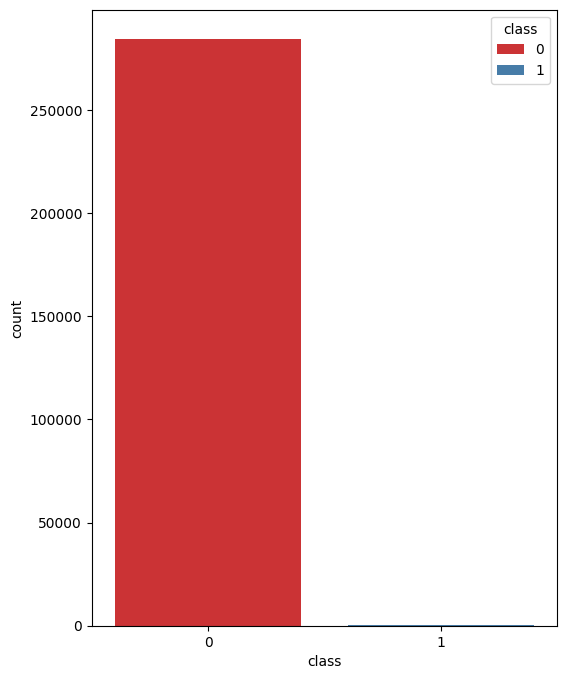

In [12]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='class', hue= 'class' , data=df, palette='Set1')
plt.show()


#### This dataset contains transaction information with 492 TH frauds out of a total of 284,807 transactions. This is a severely imbalanced dataset with the positive class (fraud) accounting for 0.172% of all transactions

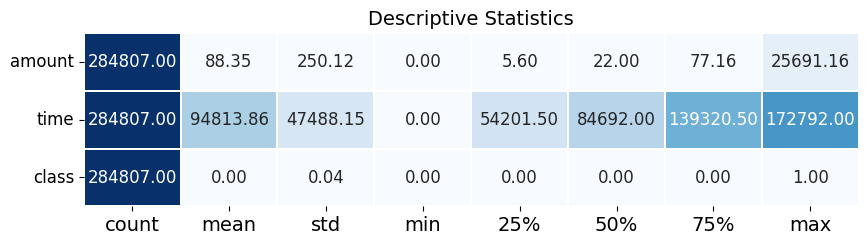

In [13]:
# statistical summary:
cols =df[["amount","time","class"]]
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

### Observations:

1.On average, each transaction happens every 94813s

2.The TB transaction amount is 88.34 with a standard deviation of 250, the maximum transaction amount is 25691

3.Based on mean and max, it is easy to see that these two variables have outliers

### Data Visualisation

In [58]:

fraud = df[df['class']==1]
normal = df[df['class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Genuine Transactions: {normal.shape}')

Shape of Fraud Transactions: (492, 32)
Shape of Genuine Transactions: (284315, 32)


#### 1.1  Bar Chart to visualize data distribution b/w both classes

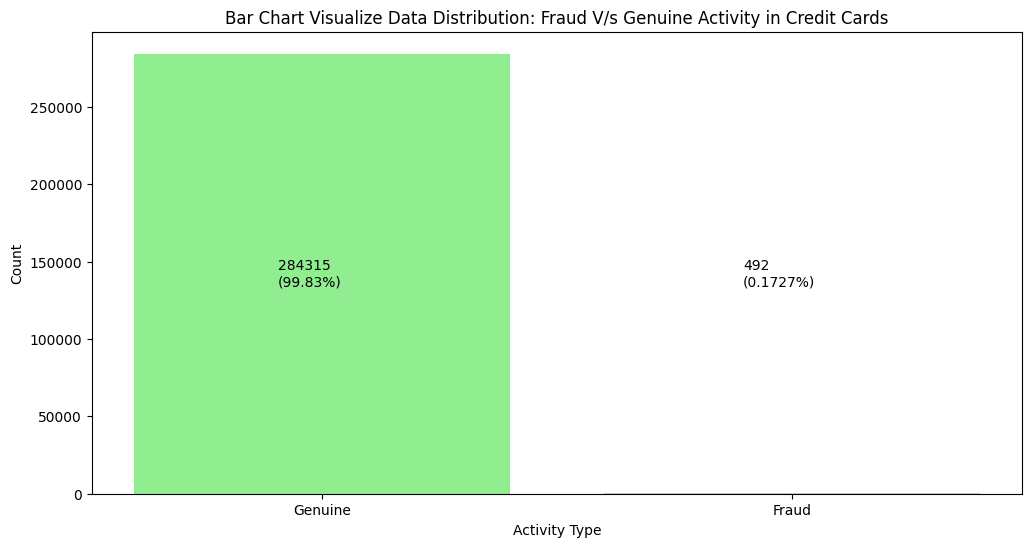

In [71]:
# Bar chart

activity_distribution = pd.DataFrame({'Activity': activity,
                                     'count': count})

activity = activity_distribution['Activity']
activity = ['Genuine', 'Fraud']
count = activity_distribution['count']
plt.figure(figsize=(12,6))
plt.bar(activity, count, color = ('lightgreen','lightblue'))
plt.title('Bar Chart Visualize Data Distribution: Fraud V/s Genuine Activity in Credit Cards')
plt.annotate('{}\n({:.4}%)'.format(classes[0], 
                                         df['class'].value_counts()[0]/df['class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(classes[1], 
                                         df['class'].value_counts()[1]/df['class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.xlabel("Activity Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

#### 1.2. Pie Chart to visualize data distribution b/w both classes

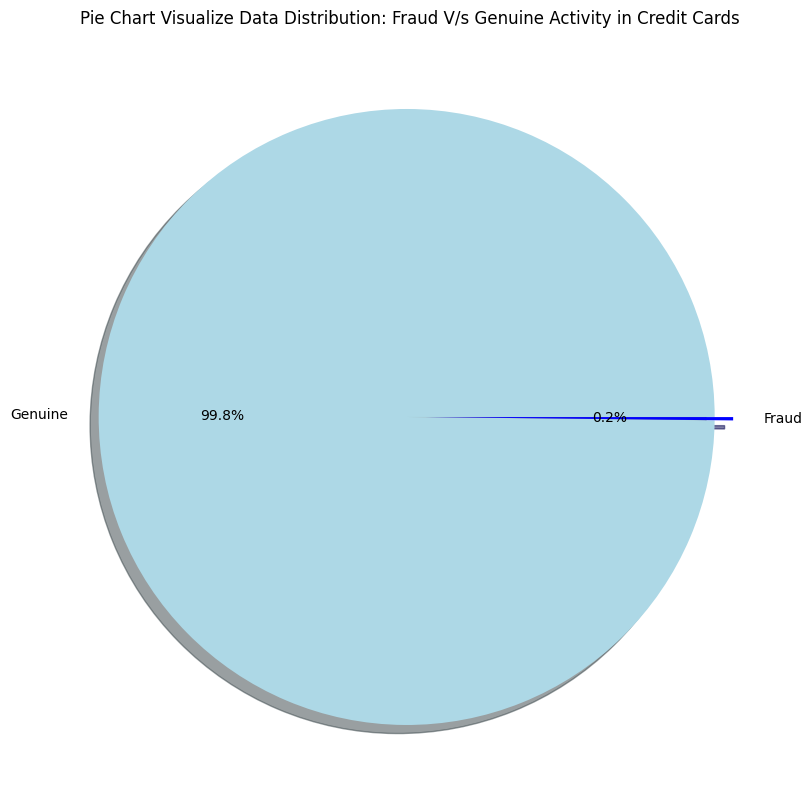

In [70]:
labels = activity_distribution['Activity']
colors = ['lightblue', 'blue']
explode = [0.01, 0.05]
plt.figure(figsize=(12,10))
plt.title('Pie Chart Visualize Data Distribution: Fraud V/s Genuine Activity in Credit Cards')
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.pie(count, explode=explode, labels=labels, shadow = 'black', autopct = '%1.1f%%', colors = colors)

plt.show() 
#autopct='%1.1f%%',

#### 1.3 Correlation of all features with target variable(Class)

In [73]:
df.corrwith(df['class']).sort_values(ascending=False)



class     1.000000
v11       0.154876
v4        0.133447
v2        0.091289
v21       0.040413
v19       0.034783
v20       0.020090
v8        0.019875
v27       0.017580
v28       0.009536
amount    0.005632
v26       0.004455
v25       0.003308
v22       0.000805
v23      -0.002685
v15      -0.004223
v13      -0.004570
v24      -0.007221
hour     -0.012323
time     -0.012323
v6       -0.043643
v5       -0.094974
v9       -0.097733
v1       -0.101347
v18      -0.111485
v7       -0.187257
v3       -0.192961
v16      -0.196539
v10      -0.216883
v12      -0.260593
v14      -0.302544
v17      -0.326481
dtype: float64

#### 1.4 Visualize Correlation(Bar Chart)

<Axes: title={'center': 'Correlation with class'}>

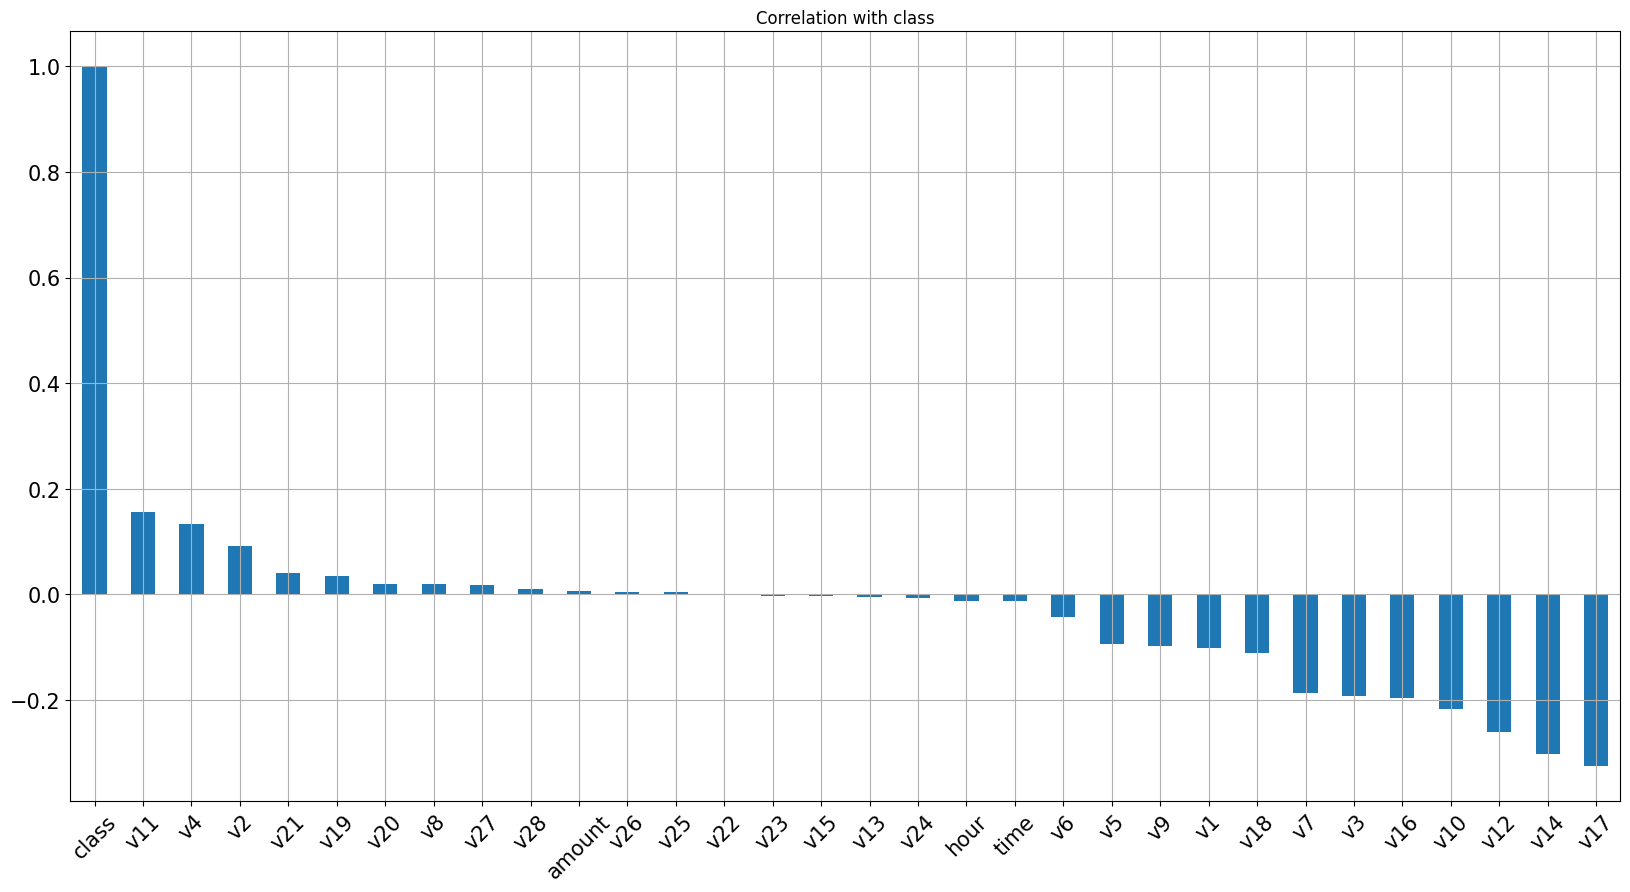

In [74]:
df.corrwith(df['class']).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

## Distribution Related To Time

#### 1. Temporal Distribution

#### Observation: 

This histogram shows the distribution of transaction times ('Time') in hours. It helps in identifying peak hours or periods when fraudulent transactions might occur more frequently.

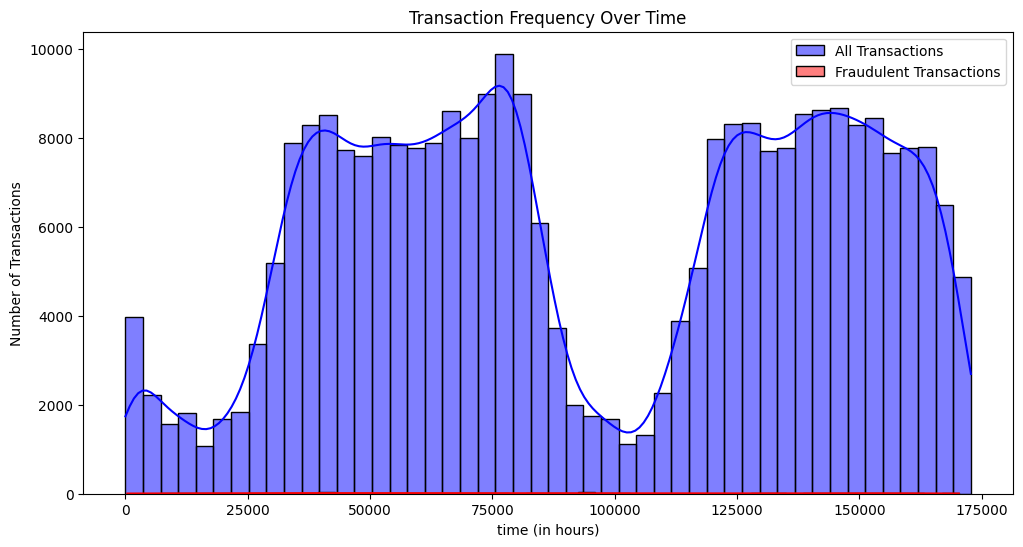

In [18]:
# Example time-based analysis
fraud = df[df['class'] == 1]
genuine = df[df['class'] == 0]

# Plotting transaction frequency over time (hours)
plt.figure(figsize=(12, 6))
sns.histplot(df['time'], bins=48, kde=True, color='blue', label='All Transactions')
sns.histplot(fraud['time'], bins=48, kde=True, color='red', label='Fraudulent Transactions')
plt.title('Transaction Frequency Over Time')
plt.xlabel('time (in hours)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

#### 2. Temporal Patterns

 #### Observation: 
 
 This line plot shows how the average transaction amount varies by hour of the day. It helps in understanding spending patterns and whether fraudulent transactions exhibit specific patterns at certain times.

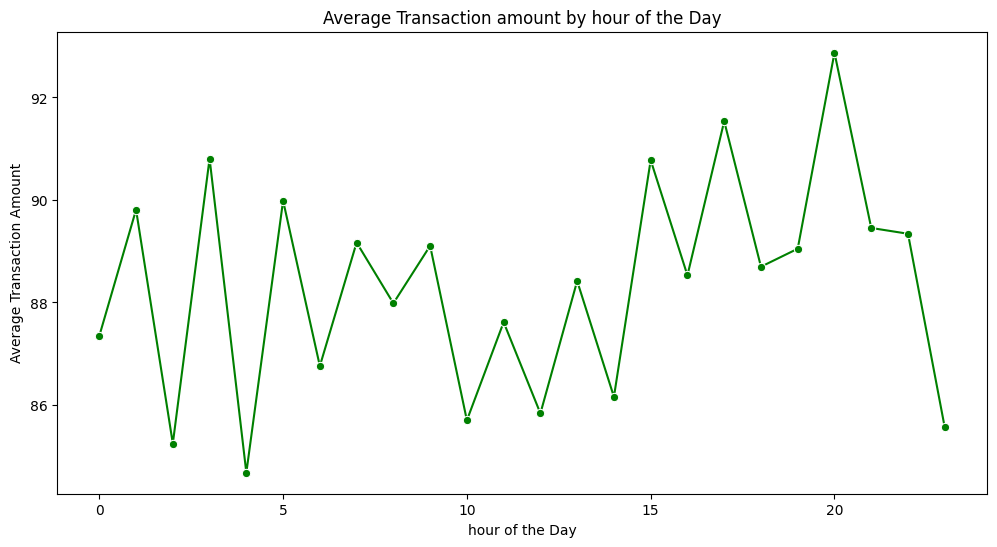

In [19]:
# Grouping transactions by hour and calculating average transaction amount
df['hour'] = df['time'] % 24  # Extract hour of the day
hourly_data = df.groupby('hour').mean()

# Plotting average transaction amount by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='amount', data=hourly_data, marker='o', color='green')
plt.title('Average Transaction amount by hour of the Day')
plt.xlabel('hour of the Day')
plt.ylabel('Average Transaction Amount')
plt.show()


### 3. Fraud vs. Genuine Transactions

### Observations 

This histogram compares the temporal distribution of fraud and genuine transactions. It helps in identifying any distinct patterns or anomalies in fraudulent transactions over time.

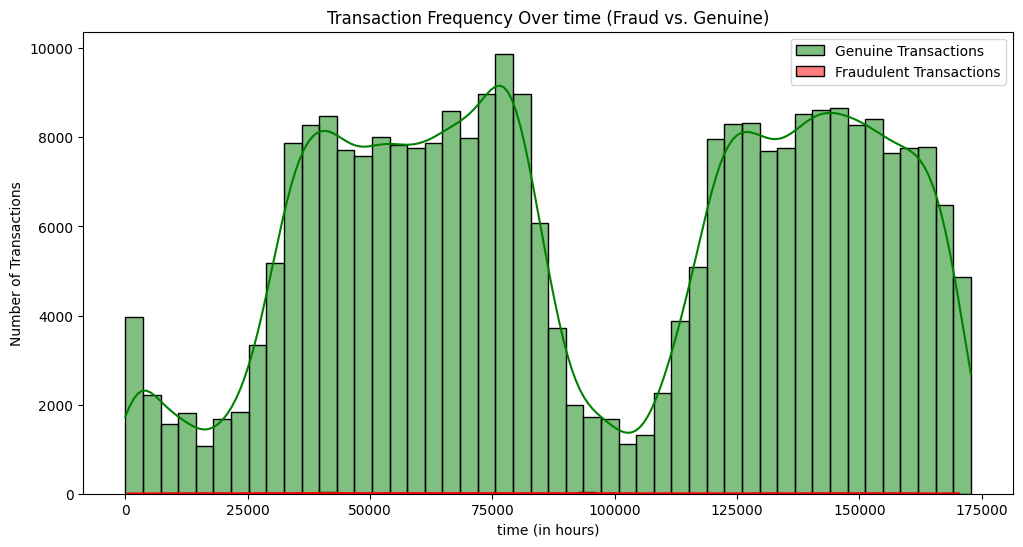

In [20]:
# Separate fraud and genuine transactions
fraud = df[df['class'] == 1]
genuine = df[df['class'] == 0]

# Plotting transaction frequency over time for fraud and genuine transactions
plt.figure(figsize=(12, 6))
sns.histplot(genuine['time'], bins=48, kde=True, color='green', label='Genuine Transactions')
sns.histplot(fraud['time'], bins=48, kde=True, color='red', label='Fraudulent Transactions')
plt.title('Transaction Frequency Over time (Fraud vs. Genuine)')
plt.xlabel('time (in hours)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()


#### By leveraging the 'Time' data effectively in EDA process, we can uncover temporal patterns, analyze transaction behavior over different time intervals, and gain insights that are valuable for detecting fraudulent activities in credit card transactions

#### Comparison of amount and time distributions

The first histogram (in red) shows the distribution of the amount values, indicating how frequently different transaction amounts occur.

The second histogram (in blue) shows the distribution of the time values, indicating the frequency of transactions over time.

Amount Distribution: The first histogram will provide insights into the transaction amounts. We can observe if there are common transaction values, detect outliers, and understand the general spread of transaction amounts.

Time Distribution: The second histogram will provide insights into the transaction times. You can see if transactions are evenly distributed over time, if there are specific periods with more transactions, and identify any time-based patterns.

Comparative Analysis: By displaying both histograms together, it’s easier to compare the distributions and possibly relate transaction amounts to specific times, if any pattern exists.

<Axes: ylabel='Count'>

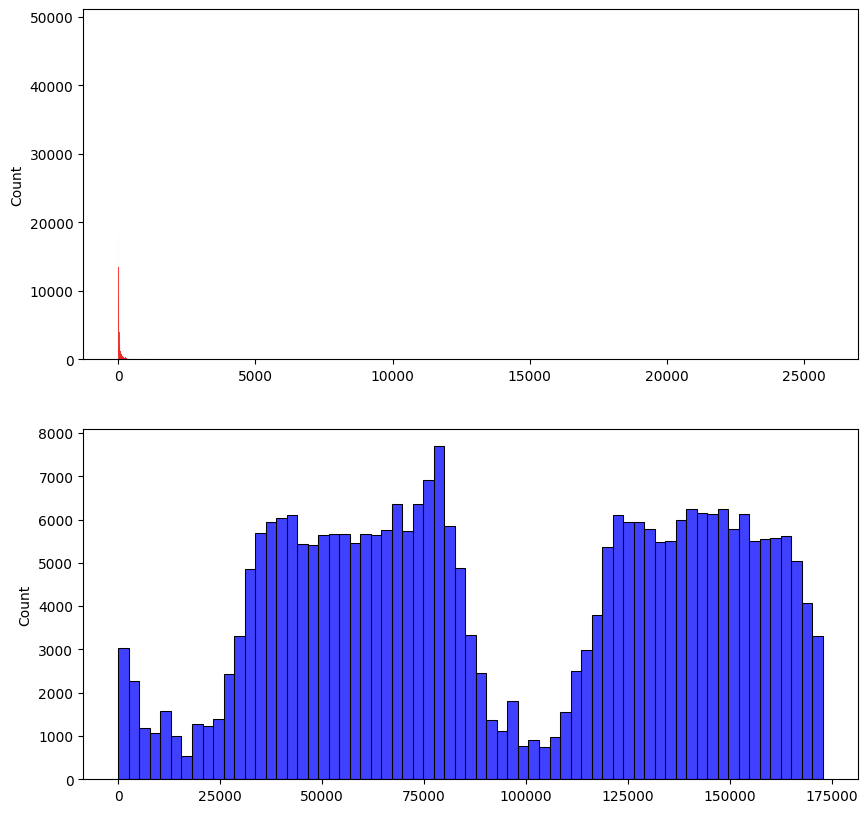

In [39]:
fig, ax= plt.subplots(2,1, figsize=(10,10))

amount= df['amount'].values
time= df['time'].values

sns.histplot(amount,ax=ax[0], color='red')
sns.histplot(time,ax=ax[1],color='blue')

### Visual Comparison between Fraud and Genuine Transactions

The provided code is a Python script using Matplotlib and Seaborn to create a side-by-side comparison of histograms. 

Observations 

Visual Comparison: The main goal of this code is to visually compare the distribution of transaction amounts between fraudulent and genuine transactions.

Histogram Details: By using 100 bins, the histograms will show detailed distributions, highlighting the frequency of transactions across different amount ranges for both types of transactions.

This side-by-side comparison can help in identifying patterns or characteristics that differentiate fraudulent transactions from genuine ones, which can be useful for developing detection algorithms or further financial analysis.


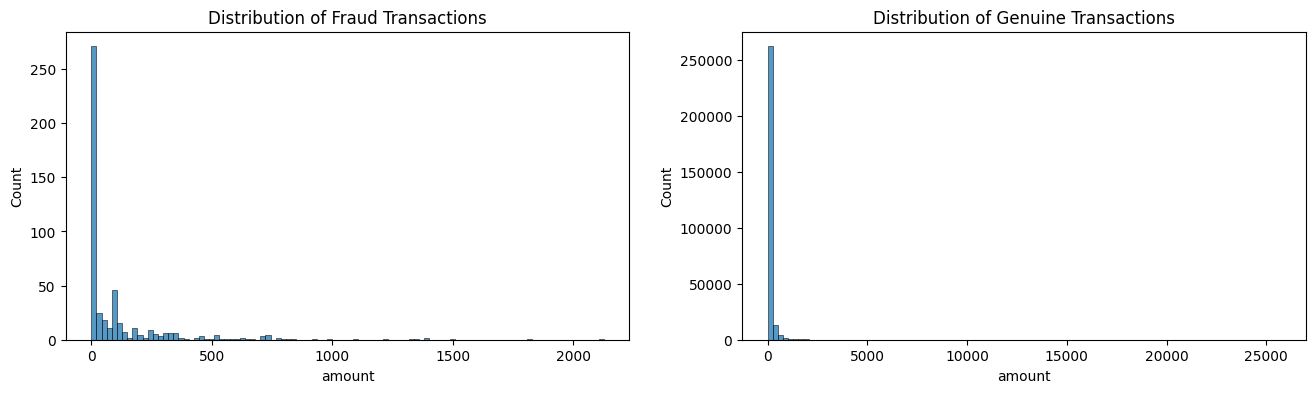

In [23]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.histplot(fraud['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(normal['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

### Correlation matrix 

The code sets up a comparison between the correlation matrices of fraud and genuine transactions using heatmaps.
It uses a mask to hide the upper triangle of the correlation matrices since they are symmetrical.
The heatmaps are displayed side-by-side for easy comparison, with distinct color maps for visual differentiation.
The titles 'Fraud' and 'Genuine' help in identifying which heatmap corresponds to which class of transactions.
By analyzing these heatmaps, one can visually inspect how the features correlate differently in fraud and genuine transactions

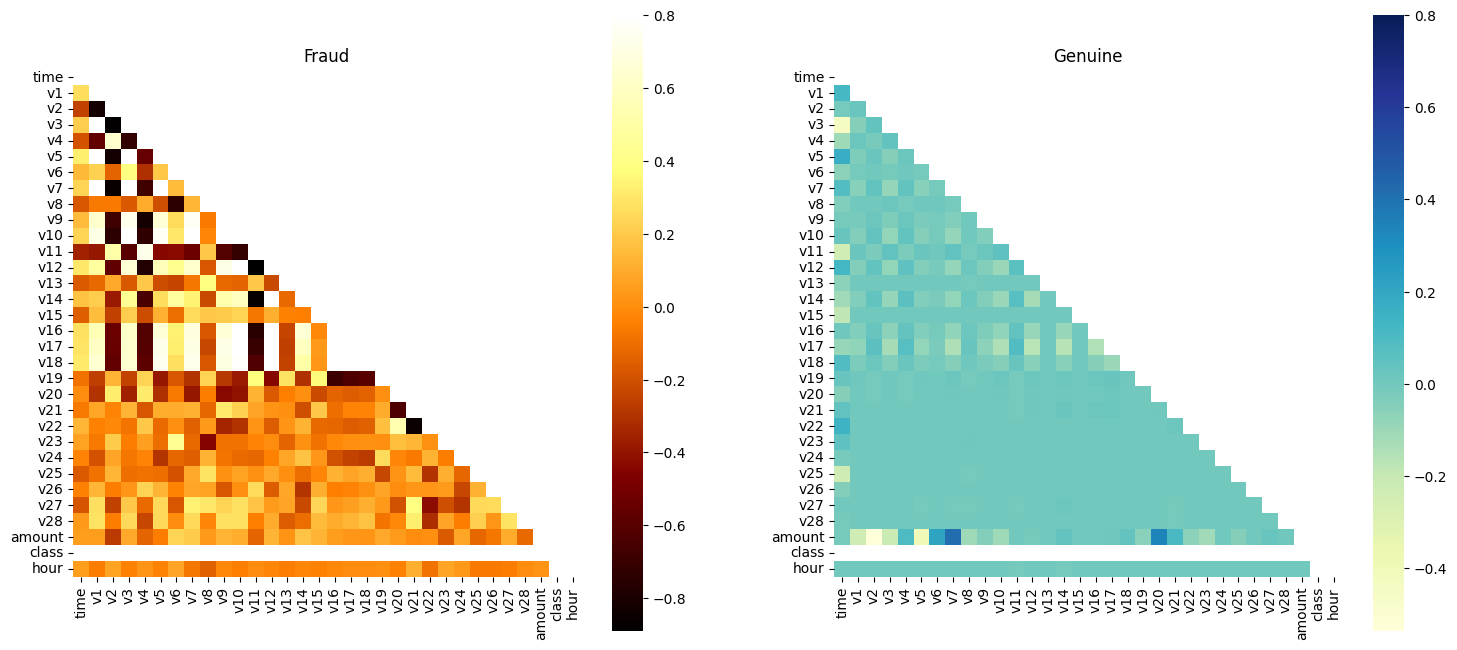

In [24]:

# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Genuine')
plt.show()

## Distribution Related To Amount

#### Observations:

With fraud transactions, the average amount of fraud is 122.22 USD, the highest is 2125 USD, the lowest is 0 and the maximum amount is 1 USD with 113 times.

In [75]:
pd.concat([fraud['amount'].describe(), normal['amount'].describe()], axis=1)

,amount,amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [76]:
fraud['amount'].value_counts().head()

amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64

### Exploring the relationship between the 'Time' (transaction timestamp) and 'Amount' (transaction amount) can reveal important insights into fraudulent activities

### 1. Temporal Distribution of Transactions

Explanation: This scatter plot shows each transaction as a point where the x-axis represents the 'Time' and the y-axis represents the 'Amount'. The plot helps visualize how transaction amounts are distributed over time. Patterns in this plot can indicate if certain times are associated with higher transaction amounts, potentially highlighting periods when fraudsters may attempt larger transactions.

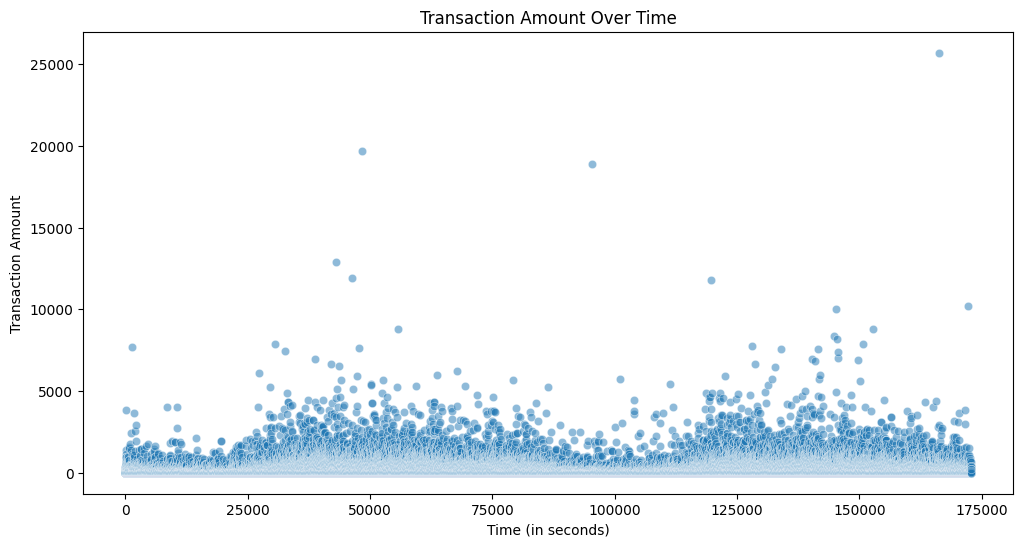

In [27]:
# Plotting transaction amount over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='time', y='amount', data=df, alpha=0.5)
plt.title('Transaction Amount Over Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Amount')
plt.show()

### 2. Temporal Patterns in Fraudulent Transactions

Explanation: This scatter plot specifically shows fraudulent transactions (colored in red) plotted against 'Time' and 'Amount'. It helps in identifying any temporal patterns in fraudulent activities, such as whether fraud tends to occur more frequently during certain time periods or involves transactions of specific amounts.

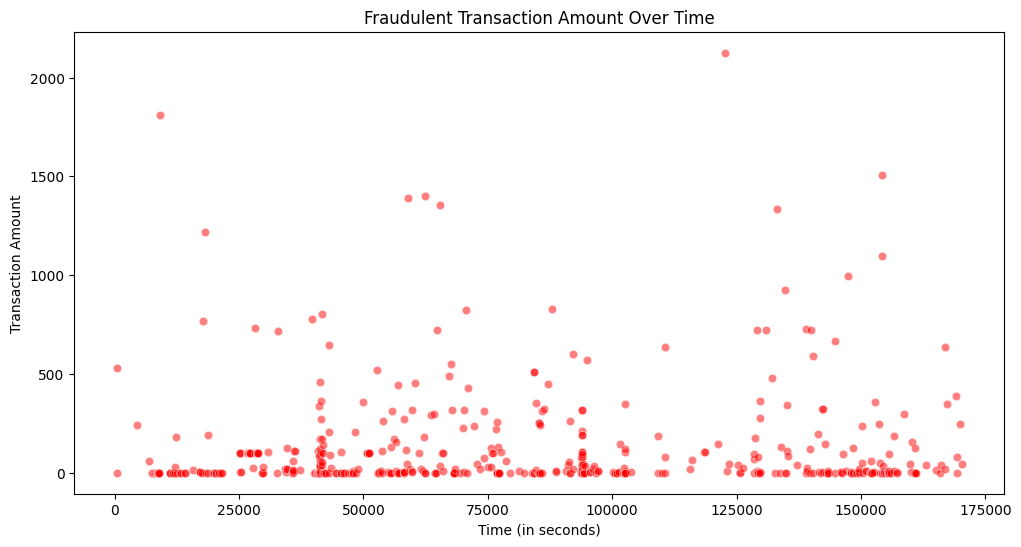

In [28]:
# Separate fraud transactions
fraudulent = df[df['class'] == 1]

# Plotting fraudulent transaction amount over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='time', y='amount', data=fraudulent, alpha=0.5, color='red')
plt.title('Fraudulent Transaction Amount Over Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Amount')
plt.show()


### 3. Average Transaction Amount by Time

Explanation: This line plot shows how the average transaction amount varies throughout the day (assuming 'Time' is converted to hours). It helps in understanding the typical transaction sizes during different times of the day, which can aid in identifying deviations that might indicate fraudulent activities.

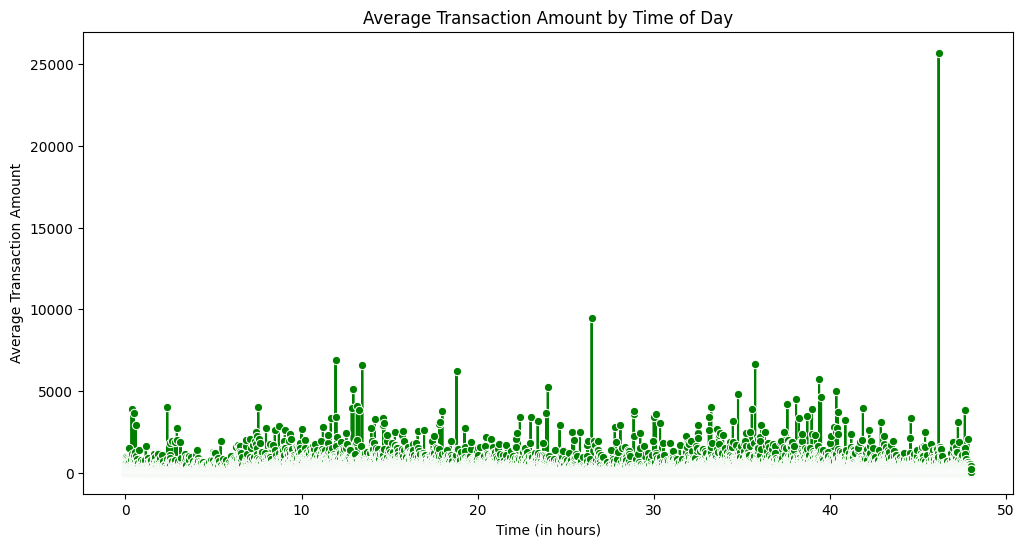

In [29]:
# Convert 'Time' to hours for better visualization
df['hour'] = df['time'] / 3600  # assuming time is in seconds, convert to hours

# Group by hour and calculate average transaction amount
average_amount_by_hour = df.groupby('hour')['amount'].mean().reset_index()

# Plotting average transaction amount by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='amount', data=average_amount_by_hour, marker='o', color='green')
plt.title('Average Transaction Amount by Time of Day')
plt.xlabel('Time (in hours)')
plt.ylabel('Average Transaction Amount')
plt.show()


### 4. Scatterplot of transaction time and amount

By distribution we can see transaction amounts are very small, where as time is distributed.
### Observation 

Also, the more transaction happens within the same period of time, the more likely the transaction amount rises. Due to the prior PCA procedure, most predictors appear to be uncorrelated 

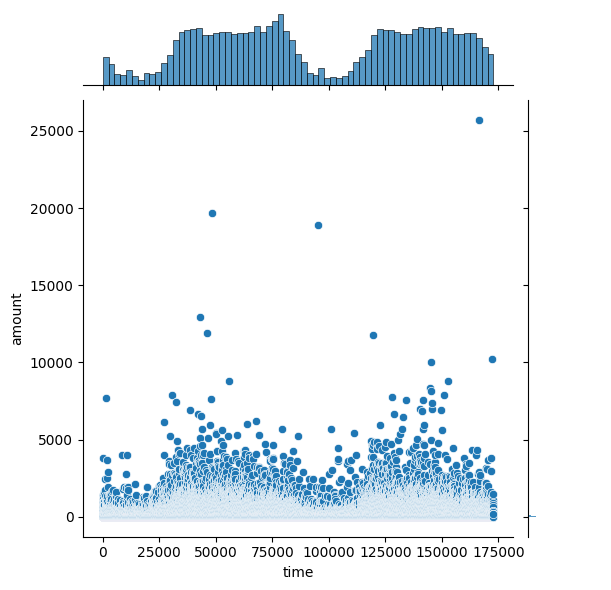

In [49]:
sns.jointplot(x="time", y="amount", data=df[["time","amount"]])

### 5. Correlation Analysis : Finally, the relationship between 'Time' and 'Amount' using correlation coefficients:

Explanation: The correlation coefficient quantifies the strength and direction of the linear relationship between 'Time' and 'Amount'. A positive correlation indicates that as 'Time' increases, 'Amount' also tends to increase (or vice versa), while a negative correlation indicates an inverse relationship.

In [30]:
# Calculate correlation coefficient between 'Time' and 'Amount'
correlation = df['time'].corr(df['amount'])
print(f"Correlation between Time and Amount: {correlation}")


Correlation between Time and Amount: -0.010596373389029256


### Conclusion

Analyzing the relationship between 'Time' and 'Amount' in a credit card fraud analysis dataset helps in understanding transaction behaviors and patterns, especially those associated with fraudulent activities. By visualizing and quantifying these relationships, we can uncover insights that are crucial for detecting and preventing fraud in credit card transactions. 